# Algoritmos de Classificação: Regressão Logística

![image.png](https://somostera.com/_nuxt/img/7eecdb7.svg)

## Warm Up

![image.png](https://media.giphy.com/media/l0Ex47BWhZ7bsaKcg/giphy.gif)

## Expectativas!

O que vocês esperam da aula de hoje?

![image.png](https://img.buzzfeed.com/buzzfeed-static/static/enhanced/web04/2012/2/14/17/enhanced-buzz-8358-1329258536-95.jpg?downsize=800:*&output-format=auto&output-quality=auto)

## Objetivo
> Avaliar se existem fatores que influenciam na promoção dos funcionários

### Contexto
> O RH da empresa está se tornando mais seletivo ao contratar novos funcionários. Dessa forma, ele quer entender o perfil de promoção dos funcionários para que no processo de seleção algum desses fatores sejam considerados. Além disso, um modelo de predição poderia ajudar na definição do budget de promoção. Você faz parte da área de **Data Science** dessa empresa, e precisa encontrar alguns insights que subsidiem o RH.

## Conclusão
> TBD

### Updated at
> 30/Jan/2020 by Tera-DSC Team

### Dataset
> Dados históricos dos funcionários da empresa.

### Warning
> Dados sensíveis.

# **Regressão** ???

![image.png](https://media.giphy.com/media/NsuQixwGTHy8M/giphy.gif)

In [ ]:
"""












"""

> O modelo de regressão logística é semelhante ao modelo de regressão linear. No entanto, no modelo logístico a variável resposta $ Y_i $ é binária. Uma variável binária assume dois valores, como por exemplo, $ Y_i=0 $ e $ Y_i=1, $ denominados "fracasso" e "sucesso", respectivamente. Neste caso, "sucesso" é o evento de interesse.

## Diferença entre Distribuição Linear e Logística
![image.png](https://estatsite.files.wordpress.com/2018/08/linear_vs_logistic_regression.jpg)

In [1]:
#-- importando as libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, log_loss, plot_confusion_matrix, roc_curve, auc, plot_roc_curve)

plt.rcParams["figure.figsize"] = (22,15)

In [2]:
#-- setando parâmetros de font
sns.set_context("notebook", font_scale=1.5)

In [3]:
#-- carregando o dataset
df = pd.read_excel('../data/Base Analytics.xlsx', sheet_name='Censo sem Estagiário')
df.head().T

,0,1,2,3,4
ADP,1,5,10,14,19
Admissão,2001-10-01 00:00:00,2001-10-01 00:00:00,2001-10-01 00:00:00,2001-10-01 00:00:00,2001-10-01 00:00:00
Desligamento,,2012-12-03 00:00:00,,2011-05-31 00:00:00,2010-09-01 00:00:00
Desligado?,N,Y,N,Y,Y
Iniciativa Desligamento,NaN,Funcionário,NaN,Funcionário,Empregador
...,...,...,...,...,...
PROMOÇÃO 2014,NaN,NaN,NaN,NaN,NaN
PROMOÇÃO 2015,NaN,NaN,NaN,NaN,NaN
PROMOÇÃO 2016,NaN,NaN,NaN,NaN,NaN
PROMOÇÃO 2017,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

In [4]:
#-- apresentando as dimensões do dataset
df.shape

(597, 63)

In [5]:
#-- printando o tipo das variáveis
df.dtypes

ADP                                 int64
Admissão                   datetime64[ns]
Desligamento                       object
Desligado?                         object
Iniciativa Desligamento            object
                                ...      
PROMOÇÃO 2014                      object
PROMOÇÃO 2015                      object
PROMOÇÃO 2016                      object
PROMOÇÃO 2017                      object
PROMOVIDO                           int64
Length: 63, dtype: object

In [6]:
#-- printando os nomes das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ADP                        597 non-null    int64         
 1   Admissão                   597 non-null    datetime64[ns]
 2   Desligamento               597 non-null    object        
 3   Desligado?                 597 non-null    object        
 4   Iniciativa Desligamento    253 non-null    object        
 5   Tempo de Casa              597 non-null    float64       
 6   Cod.Cargo                  597 non-null    int64         
 7   Cargo                      597 non-null    object        
 8   Cod.Cargo Admissão         597 non-null    int64         
 9   Cargo Admissão             597 non-null    object        
 10  CC                         597 non-null    int64         
 11  Area                       597 non-null    object        
 12  Diretori

In [7]:
#-- pritnando a quantidade de missing values
null_count = df.isnull().sum().sort_values(ascending=False)
null_percentage = null_count / len(df)
pd.DataFrame(data=[null_count, null_percentage],
             index=['null_amount', 'null_ratio']).T

,null_amount,null_ratio
2012/13 Goal Achievement,597.0,1.000000
DISSIDIO 2017,596.0,0.998325
AUMENTO 2014,589.0,0.986600
AUMENTO 2012,589.0,0.986600
PROMOÇÃO 2013,585.0,0.979899
...,...,...
Idade na Admissão,0.0,0.000000
Sexo,0.0,0.000000
Banda,0.0,0.000000
Nivel,0.0,0.000000


In [8]:
#-- printando algumas métricas dos dados numéricos do dataset
df.describe()

,ADP,Tempo de Casa,Cod.Cargo,Cod.Cargo Admissão,CC,Idade Atual/ Desligamento,Idade na Admissão,Banda,Hora Extra 2016,Hora Negativa 2016,...,Hora Extra 2017,Hora Negativa 2017,Ad. Noturno 2017,Absenteísmo 2017,2012/13 Goal Achievement,2013/14 Goal Achievement,2014/15 Goal Achievement,2015/16 Goal Achievement,2016/17 Goal Achievement,PROMOVIDO
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,258.000000,257.000000,...,249.000000,249.000000,249.000000,368.000000,0.0,155.000000,175.000000,314.000000,334.000000,597.000000
mean,396.296482,4.114050,812.654941,785.649916,1116.221106,35.558257,32.534416,333.584590,65.308810,4.339209,...,39.885797,3.264123,1.963722,0.078804,NaN,91.037419,107.680571,103.543312,104.483533,0.194305
std,402.304237,3.030217,130.416582,120.734357,174.526891,8.626609,8.335124,179.129743,74.081053,10.836156,...,48.930661,12.315578,6.167210,0.523858,NaN,12.872765,9.856783,8.611132,7.530985,0.395996
min,1.000000,0.024658,520.000000,520.000000,8.000000,19.000000,18.734247,100.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,80.000000,77.100000,75.600000,0.000000
25%,179.000000,1.821918,704.000000,685.000000,1014.000000,29.000000,26.312329,200.000000,12.979167,0.000000,...,5.133333,0.000000,0.000000,0.000000,NaN,89.550000,100.000000,100.000000,100.925000,0.000000
50%,328.000000,3.575342,811.000000,785.000000,1100.000000,34.000000,30.660274,300.000000,43.683333,0.000000,...,21.450000,0.000000,0.000000,0.000000,NaN,94.000000,105.000000,103.800000,104.000000,0.000000
75%,477.000000,5.479452,903.000000,864.000000,1250.000000,41.153425,37.726027,500.000000,90.362500,3.300000,...,61.083333,1.516667,0.533333,0.000000,NaN,97.000000,115.000000,108.000000,107.300000,0.000000
max,2066.000000,17.260274,1084.000000,1084.000000,2090.000000,66.000000,63.438356,850.000000,527.233333,97.066667,...,287.150000,160.800000,43.450000,7.000000,NaN,100.000000,135.900000,134.600000,135.000000,1.000000


## Será que eu posso utilizar todo o Dataset?

In [ ]:
"""














"""

In [9]:
#-- retornando menor data de admissão
min(df['Admissão'])

Timestamp('2001-06-18 00:00:00')

In [10]:
#-- filtrando pela data de admissão
df_ano = df[df['Admissão'] >= '2011-01-01']

In [11]:
#-- retornando o tamanho do dataset
df_ano.shape

(439, 63)

In [12]:
#-- verificando os missing values do dataset
null_count = df_ano.isnull().sum().sort_values(ascending=False)
null_percentage = null_count / len(df_ano)
pd.DataFrame(data=[null_count, null_percentage],
             index=['null_amount', 'null_ratio']).T

,null_amount,null_ratio
2012/13 Goal Achievement,439.0,1.000000
DISSIDIO 2017,438.0,0.997722
PROMOÇÃO 2012,435.0,0.990888
PROMOÇÃO 2013,434.0,0.988610
AUMENTO 2012,432.0,0.984055
...,...,...
Idade na Admissão,0.0,0.000000
Sexo,0.0,0.000000
Banda,0.0,0.000000
Nivel,0.0,0.000000


### Distribuição das Idades

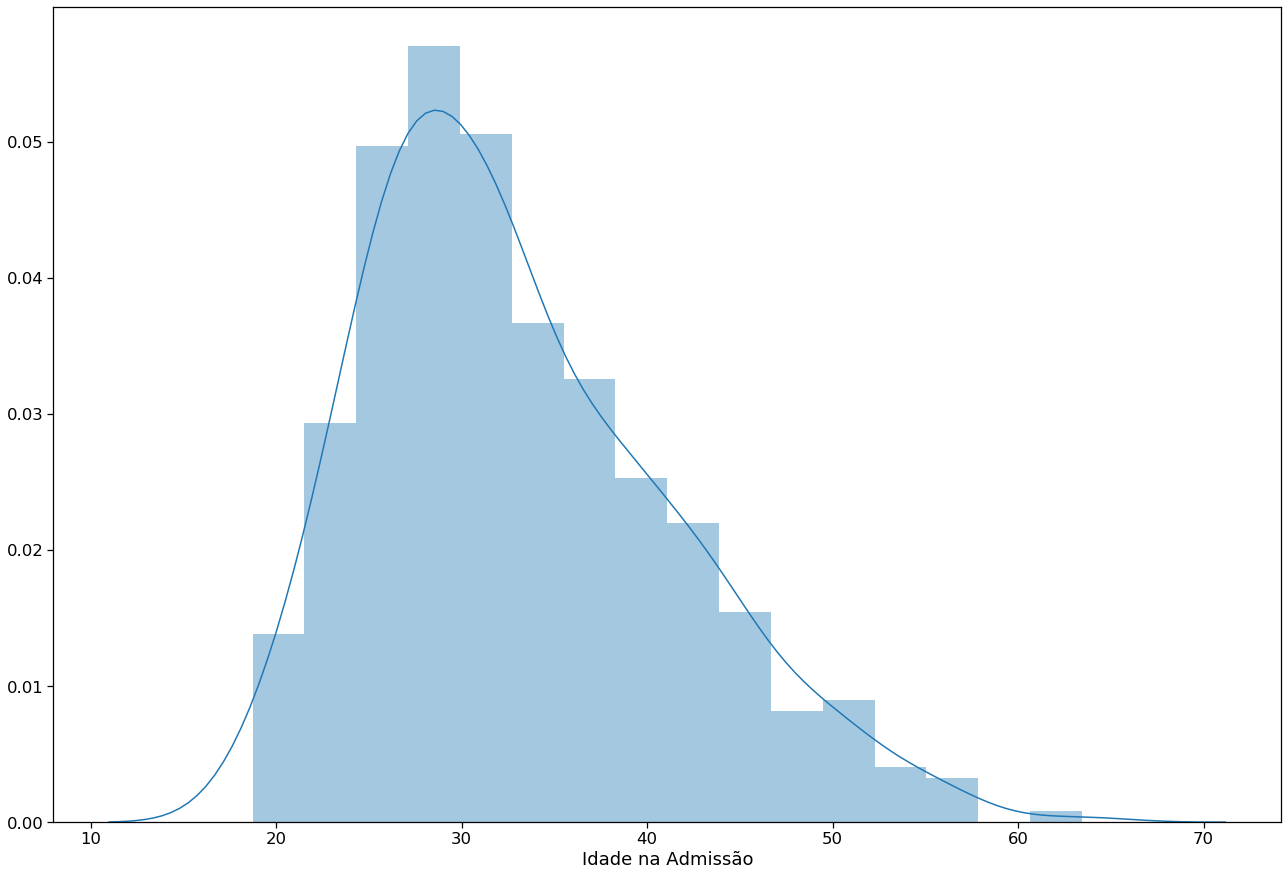

In [13]:
#-- pritando um histograma da idade de admissão dos funcionários
_ = sns.distplot(df_ano['Idade na Admissão'])

### Hora Extra

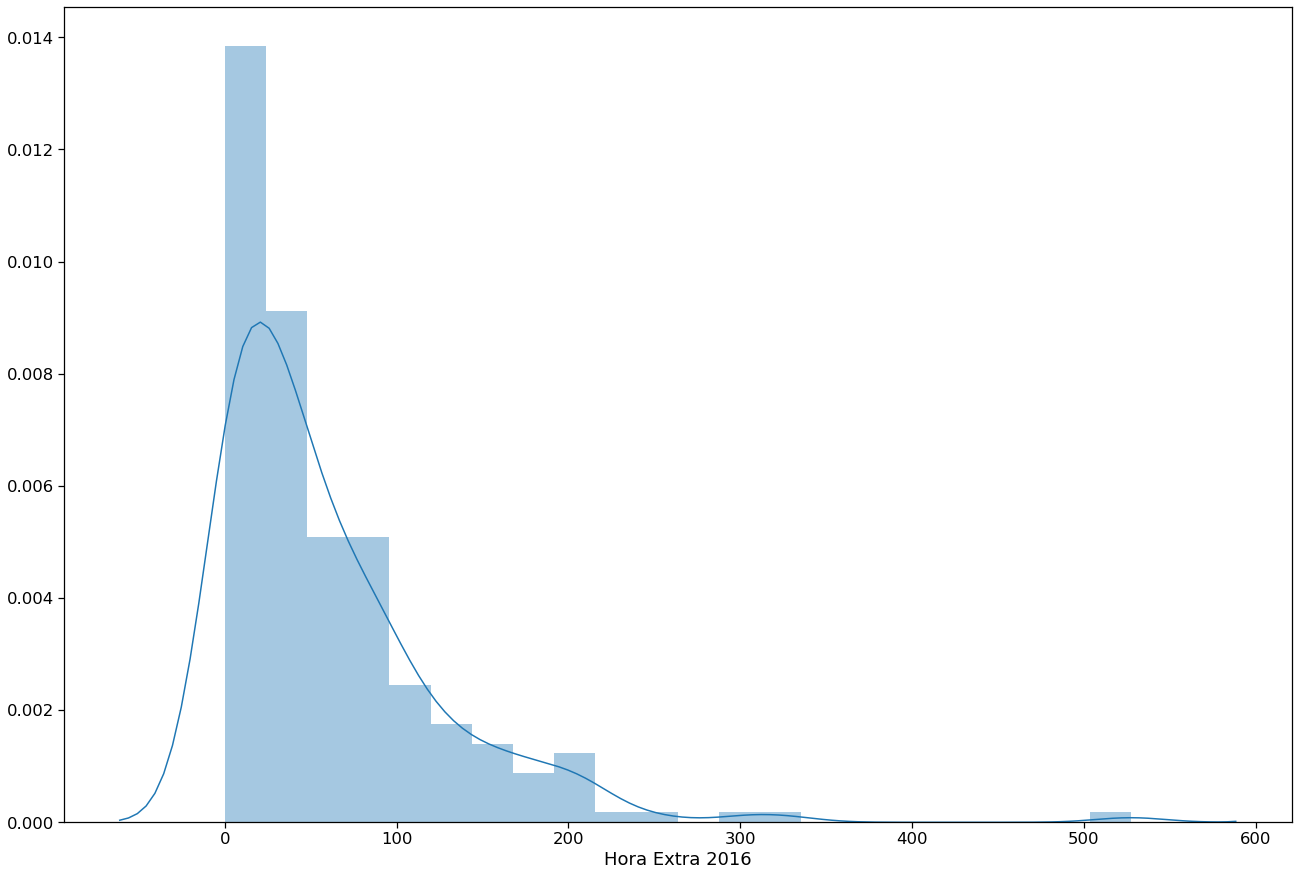

In [14]:
#-- plotando o gráfico das horas extras
_ = sns.distplot(df_ano['Hora Extra 2016'])

In [15]:
df_ano['Hora Extra 2016'].isnull().sum()

201

In [16]:
#-- preenchendo os missing values com flags
df_ano['Hora Extra 2016'].fillna(-100, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


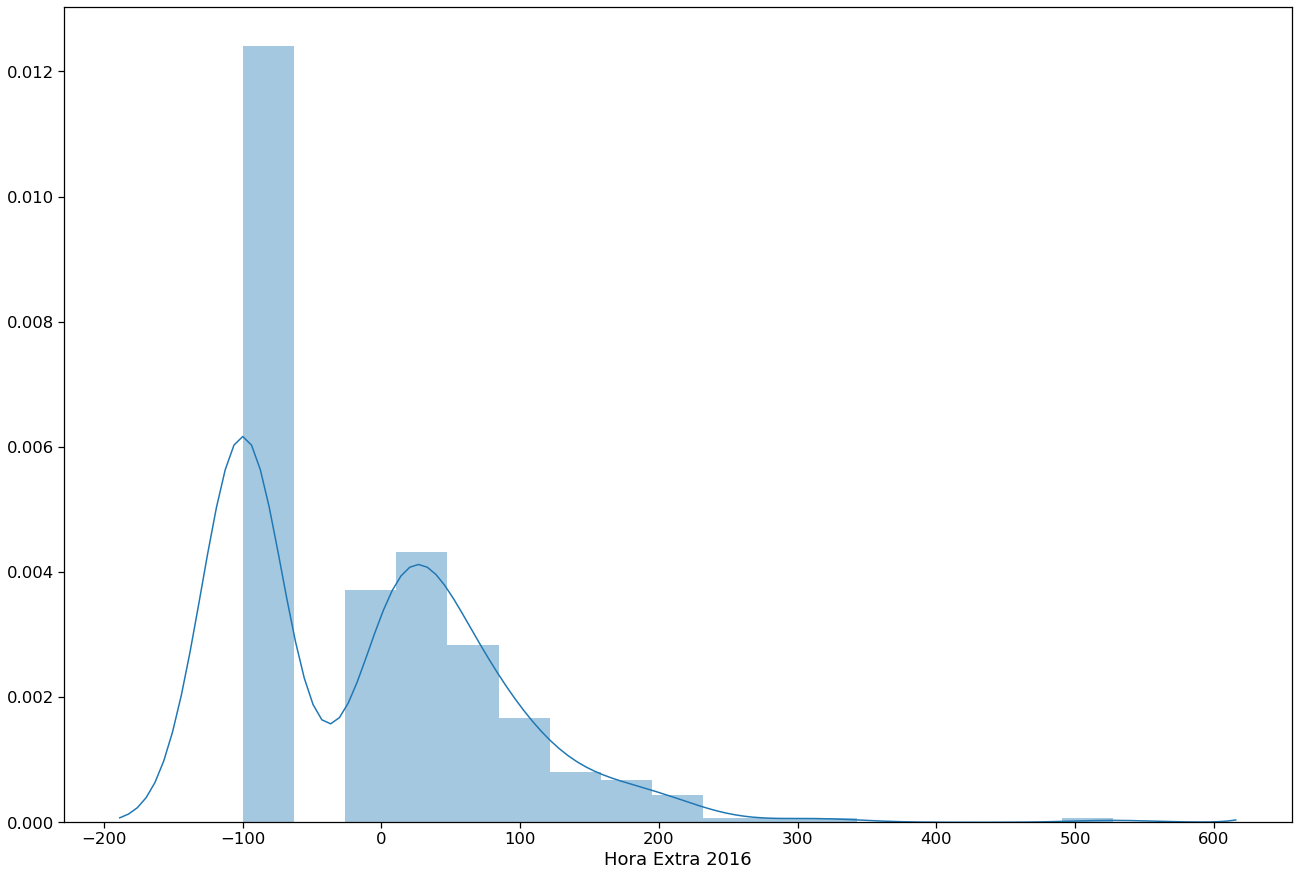

In [17]:
#-- plotando o hostograma das horas extras
_ = sns.distplot(df_ano['Hora Extra 2016'])

### Qual a idade de desligamento?

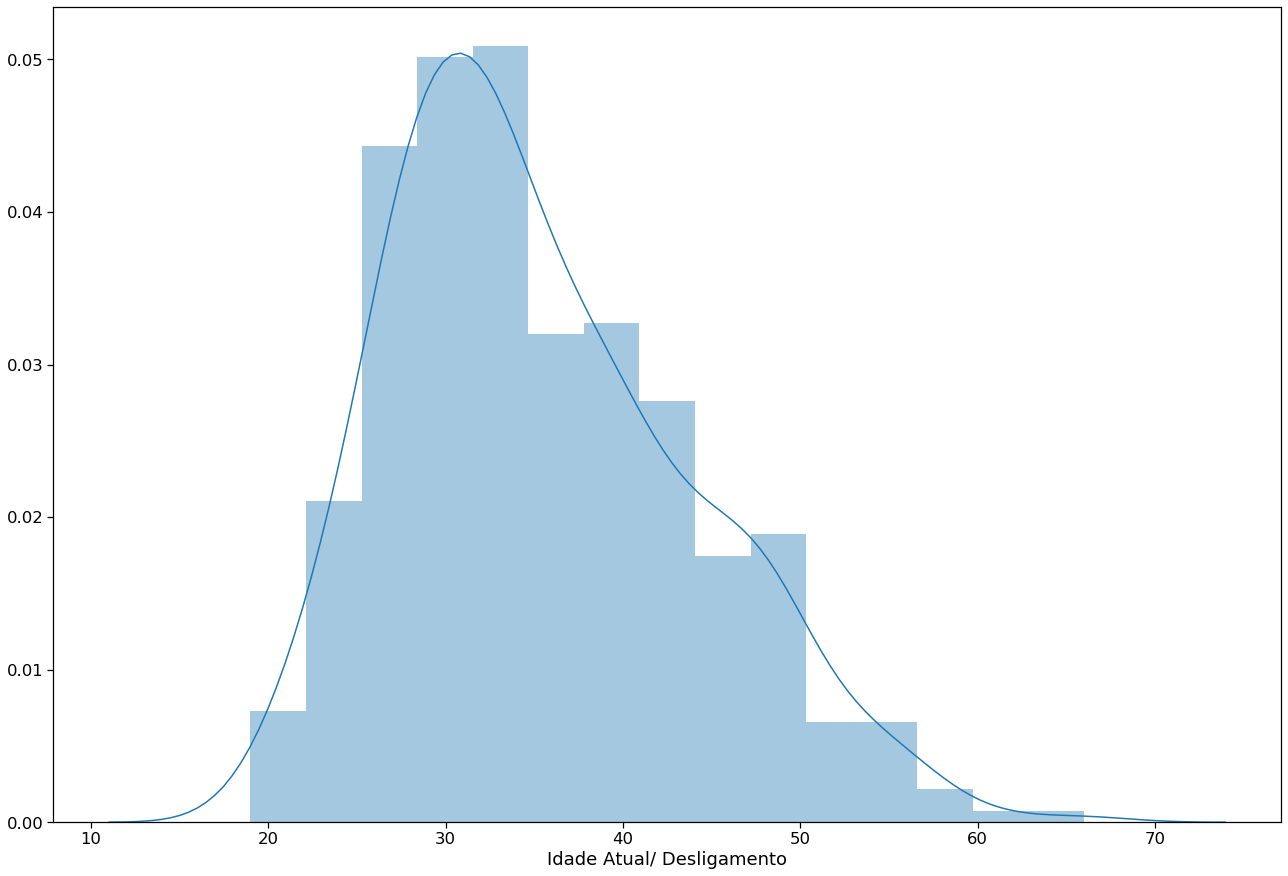

In [18]:
#-- plotando o histograma da idade de desligamento
_ = sns.distplot(df_ano['Idade Atual/ Desligamento'])

### Qual outros gráficos vocês fariam?

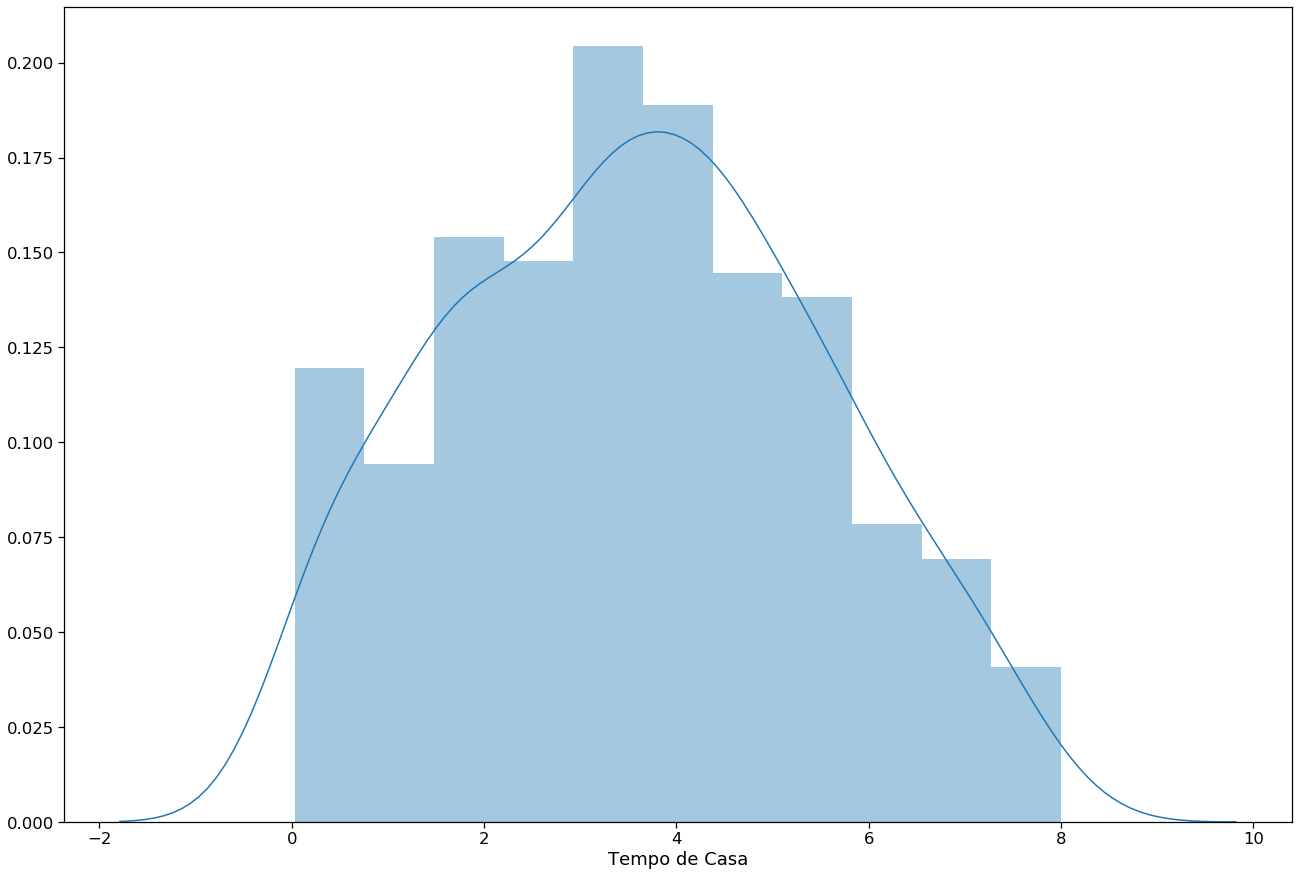

In [19]:
_ = sns.distplot(df_ano['Tempo de Casa'])

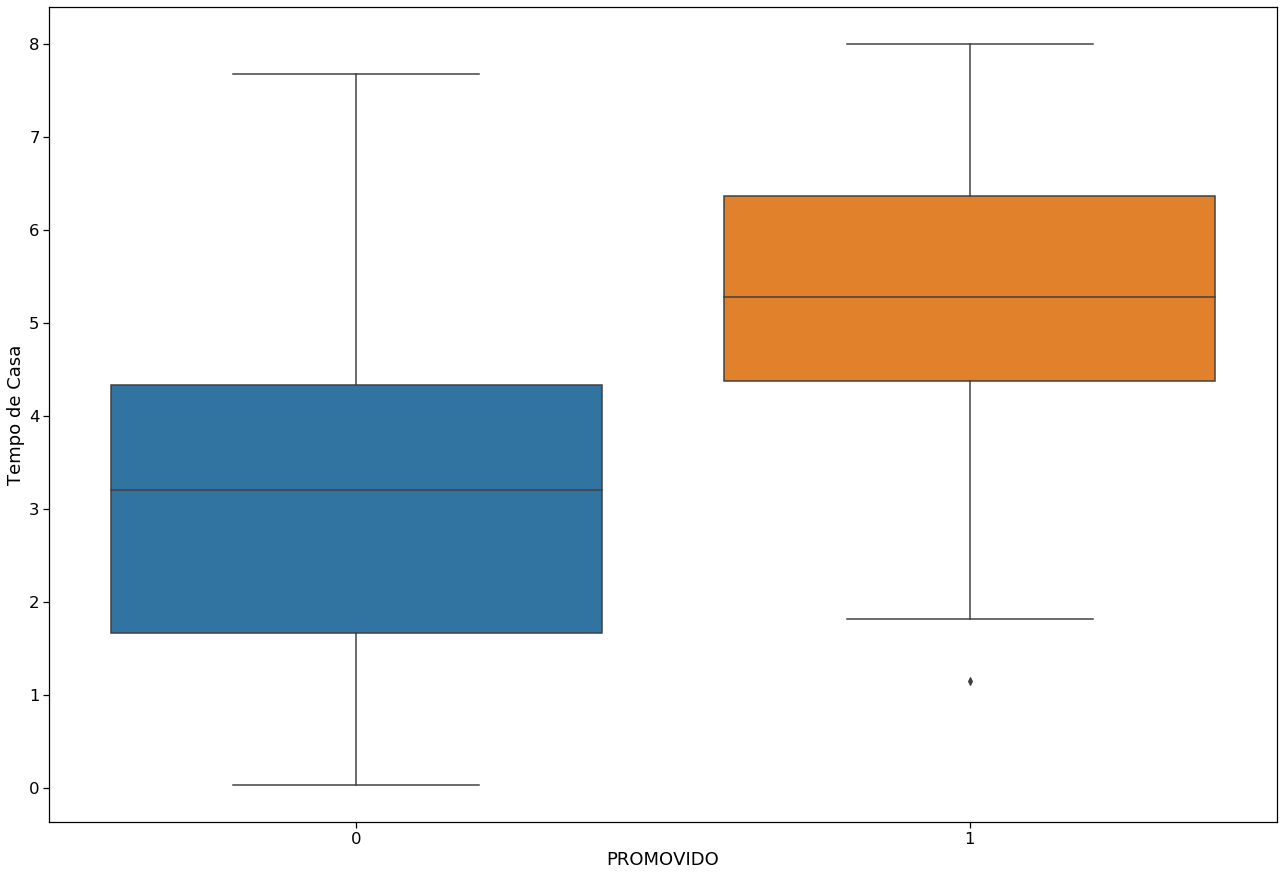

In [20]:
#-- plotando boxplot da promoção pelo tempo de casa
_ = sns.boxplot(x=df_ano['PROMOVIDO'], y=df_ano['Tempo de Casa'])

## Preparando os dados

In [21]:
#-- separando a variável do dataset de análise
X = df_ano.drop(columns=['PROMOVIDO'])
y = df_ano['PROMOVIDO']

In [22]:
#-- separando os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

## Aplicando a Regressão Logística

In [23]:
#-- guardando o algoritmo de regressão logística
logreg = LogisticRegression()

In [24]:
#-- aplicando o algoritmo 
logreg.fit(X_train, y_train)

#-- predizendo as respostas
y_pred = logreg.predict(X_test)

TypeError: invalid type promotion

In [25]:
#-- selecionadndo apenas as variáveis númericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_ano.select_dtypes(include=numerics).T

,123,124,125,126,127,128,129,130,131,132,...,558,559,560,561,562,563,564,565,566,567
ADP,153.000000,154.000000,155.000000,156.000000,157.000000,158.000000,159.000000,160.000000,161.000000,162.000000,...,588.000000,589.000000,590.000000,591.000000,592.000000,593.000000,594.000000,595.000000,596.000000,597.000000
Tempo de Casa,7.997260,7.756164,6.175342,0.452055,7.671233,7.665753,7.665753,1.649315,7.589041,0.243836,...,1.649315,1.619178,1.619178,1.619178,1.610959,1.572603,1.553425,1.534247,1.416438,1.416438
Cod.Cargo,955.000000,825.000000,681.000000,791.000000,773.000000,742.000000,641.000000,641.000000,851.000000,792.000000,...,1073.000000,1081.000000,650.000000,834.000000,1082.000000,1037.000000,949.000000,1083.000000,1076.000000,1084.000000
Cod.Cargo Admissão,743.000000,783.000000,681.000000,791.000000,773.000000,742.000000,641.000000,641.000000,641.000000,792.000000,...,1073.000000,1081.000000,650.000000,834.000000,1082.000000,1037.000000,949.000000,1083.000000,1076.000000,1084.000000
CC,1100.000000,1016.000000,1120.000000,1100.000000,1040.000000,1300.000000,1270.000000,1250.000000,1290.000000,1010.000000,...,1120.000000,1250.000000,1030.000000,1032.000000,1120.000000,1100.000000,1010.000000,1030.000000,1003.000000,1100.000000
Idade Atual/ Desligamento,30.000000,38.000000,47.901370,31.402740,48.000000,42.000000,40.000000,55.947945,46.000000,23.504110,...,38.000000,56.000000,19.000000,21.000000,33.000000,51.000000,37.000000,42.000000,25.000000,44.000000
Idade na Admissão,24.178082,32.249315,41.726027,30.950685,42.534247,36.534247,34.326027,54.298630,40.389041,23.260274,...,38.397260,56.298630,18.942466,21.336986,32.895890,50.819178,37.443836,42.427397,25.446575,43.967123
Banda,400.000000,300.000000,700.000000,700.000000,700.000000,300.000000,200.000000,200.000000,300.000000,100.000000,...,600.000000,300.000000,100.000000,100.000000,600.000000,650.000000,300.000000,500.000000,100.000000,500.000000
Hora Extra 2016,-100.000000,90.566667,-100.000000,-100.000000,-100.000000,43.336667,-100.000000,-100.000000,73.866667,-100.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
Hora Negativa 2016,NaN,8.500000,NaN,NaN,NaN,0.000000,NaN,NaN,0.683333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#-- criando um dataset novo
df_ano_numeric = df_ano.select_dtypes(include=numerics).copy()

In [27]:
#-- selecionando as colunas desse novo dataset
df_ano_numeric = df_ano_numeric.drop(columns=['ADP', 'Cod.Cargo', 'Cod.Cargo Admissão', 'CC', 'Hora Extra 2016', 'Hora Negativa 2016', 'Ad. Noturno 2016', 'Absenteísmo 2016', 'Hora Extra 2017', 'Hora Negativa 2017', 'Ad. Noturno 2017', 'Absenteísmo 2017', 'Banda', '2012/13 Goal Achievement'], axis=1)

In [28]:
#-- pritando o head do novo dataset
df_ano_numeric.head().T

,123,124,125,126,127
Tempo de Casa,7.997260,7.756164,6.175342,0.452055,7.671233
Idade Atual/ Desligamento,30.000000,38.000000,47.901370,31.402740,48.000000
Idade na Admissão,24.178082,32.249315,41.726027,30.950685,42.534247
2013/14 Goal Achievement,93.500000,95.000000,88.000000,NaN,0.000000
2014/15 Goal Achievement,115.000000,100.300000,94.900000,NaN,NaN
2015/16 Goal Achievement,90.900000,100.000000,105.300000,NaN,109.700000
2016/17 Goal Achievement,108.300000,102.300000,111.500000,NaN,114.600000
PROMOVIDO,1.000000,1.000000,0.000000,0.000000,0.000000


In [29]:
#-- verificando os missing values do dataset
null_count = df_ano_numeric.isnull().sum().sort_values(ascending=False)
null_percentage = null_count / len(df_ano_numeric)
pd.DataFrame(data=[null_count, null_percentage],
             index=['null_amount', 'null_ratio']).T

,null_amount,null_ratio
2013/14 Goal Achievement,327.0,0.744875
2014/15 Goal Achievement,303.0,0.690205
2015/16 Goal Achievement,171.0,0.389522
2016/17 Goal Achievement,151.0,0.343964
PROMOVIDO,0.0,0.000000
Idade na Admissão,0.0,0.000000
Idade Atual/ Desligamento,0.0,0.000000
Tempo de Casa,0.0,0.000000


In [30]:
#-- removendo as colunas de 2013/14 e 2014/15
df_ano_numeric.drop(columns=['2013/14 Goal Achievement', '2014/15 Goal Achievement'], inplace = True)

In [31]:
#-- preenchendo os missing values
df_ano_numeric.fillna(method='bfill', inplace=True)
df_ano_numeric.fillna(method='ffill', inplace=True)

In [32]:
#-- verificando se os missing values do dataset foram todas preenchidos
null_count = df_ano_numeric.isnull().sum().sort_values(ascending=False)
null_percentage = null_count / len(df_ano_numeric)
pd.DataFrame(data=[null_count, null_percentage],
             index=['null_amount', 'null_ratio']).T

,null_amount,null_ratio
PROMOVIDO,0.0,0.0
2016/17 Goal Achievement,0.0,0.0
2015/16 Goal Achievement,0.0,0.0
Idade na Admissão,0.0,0.0
Idade Atual/ Desligamento,0.0,0.0
Tempo de Casa,0.0,0.0


In [33]:
#-- printando as dimensões
df_ano_numeric.shape

(439, 6)

In [34]:
#-- verificando os tipos das variáveis
df_ano_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 123 to 567
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tempo de Casa              439 non-null    float64
 1   Idade Atual/ Desligamento  439 non-null    float64
 2   Idade na Admissão          439 non-null    float64
 3   2015/16 Goal Achievement   439 non-null    float64
 4   2016/17 Goal Achievement   439 non-null    float64
 5   PROMOVIDO                  439 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 24.0 KB


In [35]:
#-- criando os datasets para análise
X = df_ano_numeric.drop(columns=['PROMOVIDO'])
y = df_ano_numeric['PROMOVIDO']

In [36]:
#-- separando a parte de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

In [37]:
#-- apllicando o algoritmo
logreg.fit(X_train, y_train)
#-- calculando a predição
y_pred = logreg.predict(X_test)

In [38]:
#-- printando os cinco primeiros valores da predição
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [39]:
#-- pritando a acuracia do teste
accuracy_test = accuracy_score(y_test, y_pred)
print(f'accuracy (test): {accuracy_test*100:.1f}%')

accuracy (test): 79.5%


## Avaliação do modelo

### Matriz de Confusão, Precisão, Recall

In [40]:
#-- printando a matriz de confusão
confusion_matrix(y_test, y_pred)

array([[94, 12],
       [15, 11]], dtype=int64)

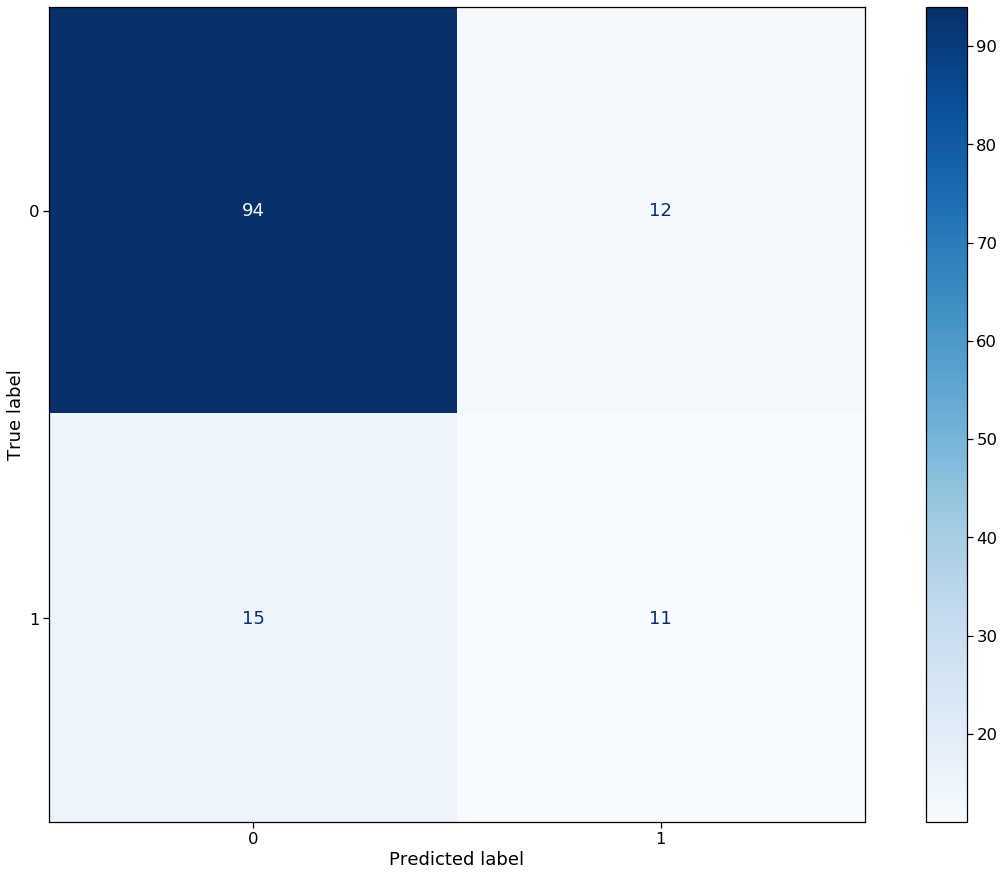

In [41]:
#-- plotando a matrix de confusão
_ = plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)

In [42]:
#-- pritando as métricas de precisão e recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       106
           1       0.48      0.42      0.45        26

    accuracy                           0.80       132
   macro avg       0.67      0.65      0.66       132
weighted avg       0.79      0.80      0.79       132



definições
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

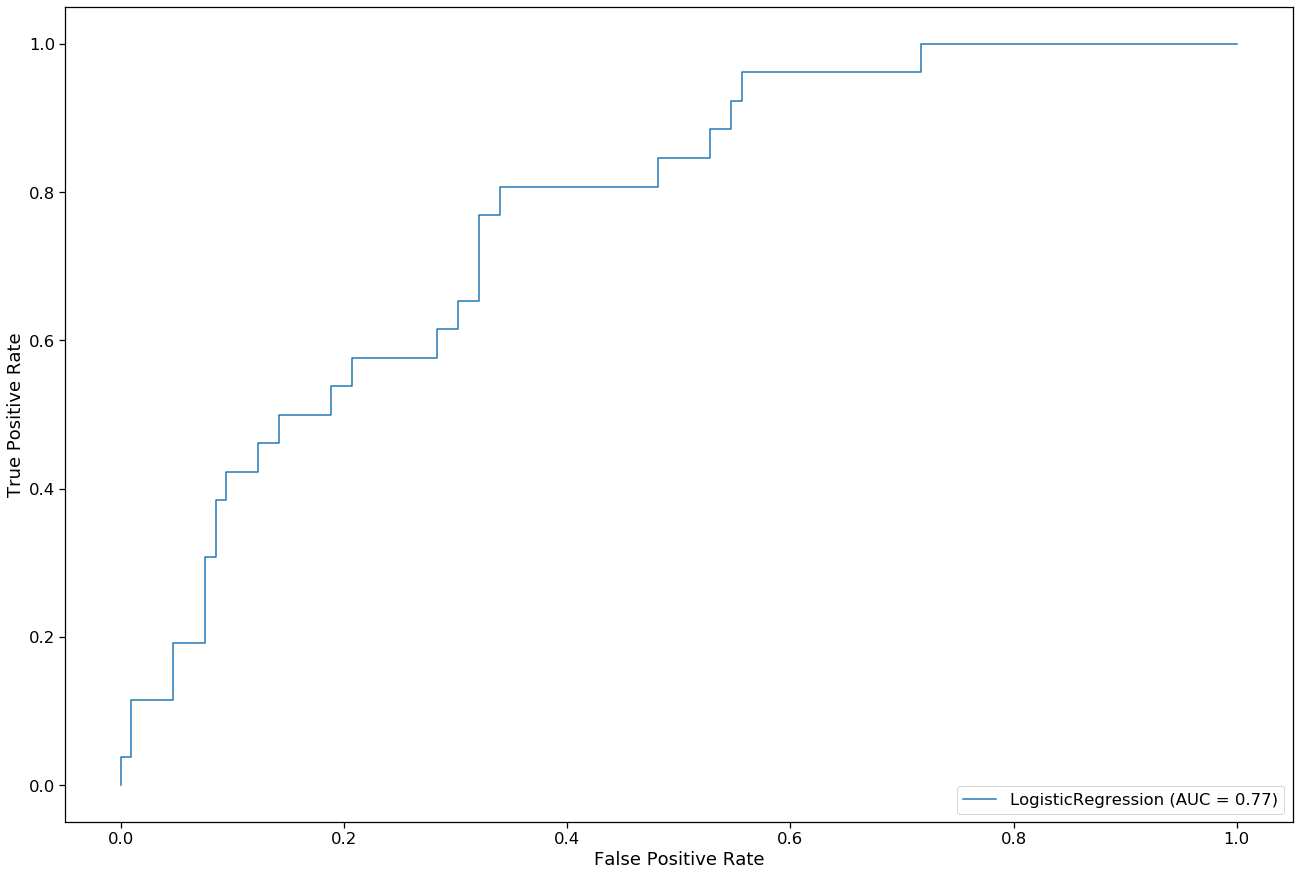

In [43]:
#-- printando a ROC
_= plot_roc_curve(logreg, X_test, y_test)

### Utilizando as probabilidades

In [44]:
#-- calculando a probabilidade dos teste
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:5]

array([[0.91183281, 0.08816719],
       [0.94397406, 0.05602594],
       [0.99631122, 0.00368878],
       [0.92216632, 0.07783368],
       [0.13751242, 0.86248758]])

In [45]:
#-- pritando a probabilidade
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba[:5]

array([0.08816719, 0.05602594, 0.00368878, 0.07783368, 0.86248758])

In [46]:
#-- comparando as respostas
preds_df = pd.DataFrame(data=[y_pred_proba, y_test.astype(str)],
                        index=['Prediction', 'True Value']).T

preds_df['Prediction'] = preds_df['Prediction'].astype(float)
preds_df['True Value'] = preds_df['True Value'].astype(str)

preds_df.head()

,Prediction,True Value
0,0.088167,0
1,0.056026,0
2,0.003689,0
3,0.077834,0
4,0.862488,1


Text(0, 0.5, 'Quantidade')

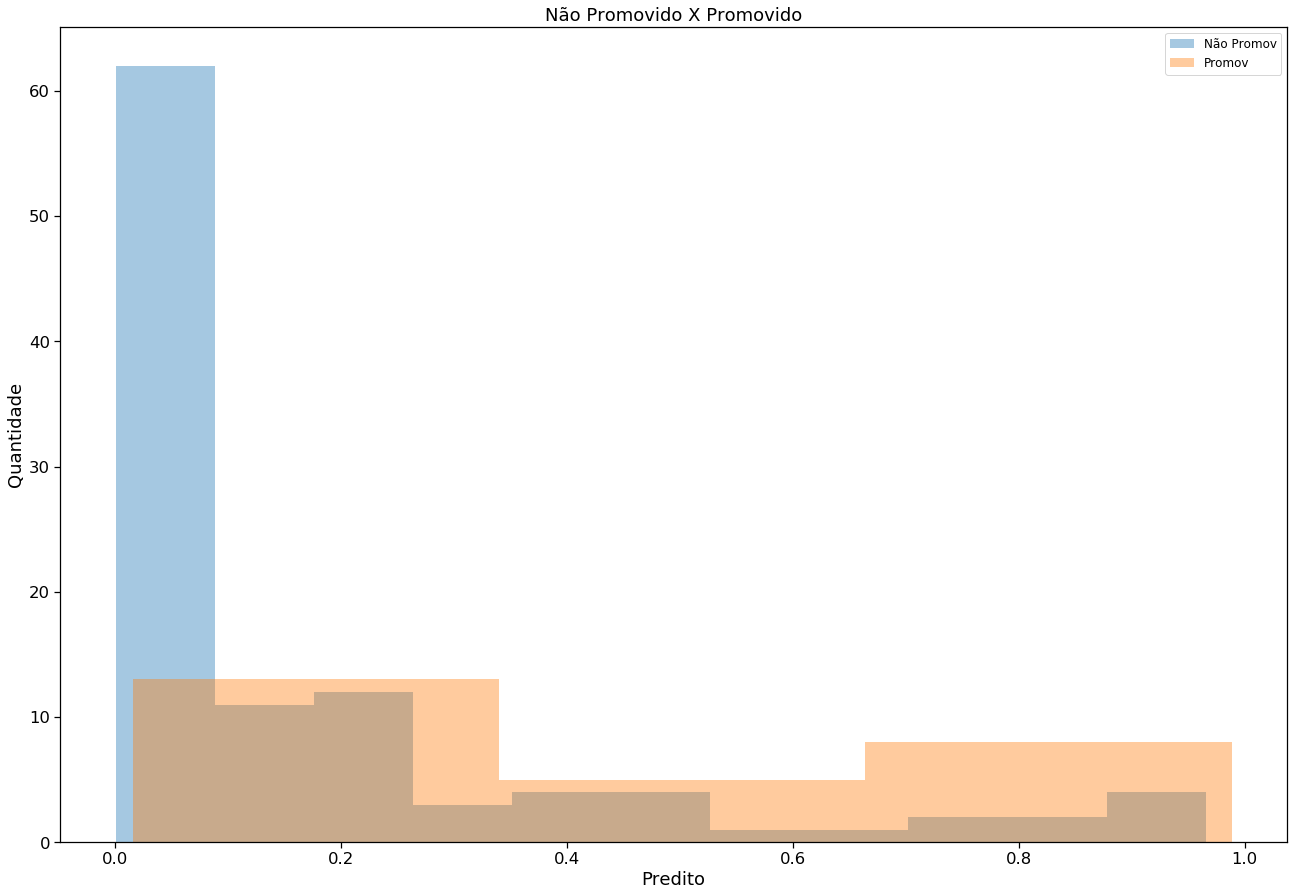

In [47]:
teste = preds_df[preds_df['True Value'] == '0']
_ = sns.distplot(teste['Prediction'],  kde=False, label='Não Promov')
teste1 = preds_df[preds_df['True Value'] == '1']
_ = sns.distplot(teste1['Prediction'],  kde=False, label='Promov')
plt.legend(prop={'size': 12})
plt.title('Não Promovido X Promovido')
plt.xlabel('Predito')
plt.ylabel('Quantidade')

In [54]:
#-- ajustando a probabilidade
y_pred_customizado = y_pred_proba >= 0.7

In [55]:
#-- printando as novas métricas
print(classification_report(y_test, y_pred_customizado))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       106
           1       0.47      0.27      0.34        26

    accuracy                           0.80       132
   macro avg       0.65      0.60      0.61       132
weighted avg       0.76      0.80      0.77       132



### Outras métricas populares

In [56]:
print(f'auc (test): {roc_auc_score(y_test, y_pred_proba):.4f}')

auc (test): 0.7700


In [57]:
#-- métrica - qt menor melhor
print(f'log loss (test): {log_loss(y_test, y_pred_proba):.3f}')

log loss (test): 0.488


### Identificação de overfitting

In [58]:
y_pred_proba_train = logreg.predict_proba(X_train)[:, 1]

In [59]:
#-- comparando os resultados do modelo de treino com o de teste
print(f'auc (train): {roc_auc_score(y_train, y_pred_proba_train):.4f}')
print(f'auc (test): {roc_auc_score(y_test, y_pred_proba):.4f}')

auc (train): 0.8927
auc (test): 0.7700


## Tentando melhorar o modelo

### One-hot-encoding

In [60]:
#-- printando os nomes das colunas
df_ano.columns.values

array(['ADP', 'Admissão', 'Desligamento', 'Desligado?',
       'Iniciativa Desligamento', 'Tempo de Casa', 'Cod.Cargo', 'Cargo',
       'Cod.Cargo Admissão', 'Cargo Admissão', 'CC', 'Area', 'Diretoria',
       'Estado Civil', 'Educação', 'Idade Atual/ Desligamento',
       'Idade na Admissão', 'Sexo', 'Banda', 'Nivel', 'Hora Extra 2016',
       'Hora Negativa 2016', 'Ad. Noturno 2016', 'Absenteísmo 2016',
       'Hora Extra 2017', 'Hora Negativa 2017', 'Ad. Noturno 2017',
       'Absenteísmo 2017', '2012/13 Rating', '2012/13 Goal Achievement',
       '2013/14 Rating', '2013/14 Goal Achievement', '2014/15 Rating',
       '2014/15 Goal Achievement', '2015/16 Rating',
       '2015/16 Goal Achievement', '2016/17 Rating',
       '2016/17 Goal Achievement', 'AUMENTO 2012', 'AUMENTO 2013',
       'AUMENTO 2014', 'AUMENTO 2015', 'AUMENTO 2016', 'AUMENTO 2017',
       'DISSIDIO 2012', 'DISSIDIO 2013', 'DISSIDIO 2014', 'DISSIDIO 2015',
       'DISSIDIO 2016', 'DISSIDIO 2017', 'MERITO 2012', 'MER

In [61]:
#-- selecionando as colunas do dataset
df_ano_misto = df_ano[['Tempo de Casa', 'Idade Atual/ Desligamento', 'Idade na Admissão', '2013/14 Goal Achievement', '2014/15 Goal Achievement', '2015/16 Goal Achievement', '2016/17 Goal Achievement', 'Estado Civil', 'Educação', 'Sexo', 'PROMOVIDO']].copy()

In [62]:
#-- printando o head do dataset
df_ano_misto.head().T

,123,124,125,126,127
Tempo de Casa,7.99726,7.75616,6.17534,0.452055,7.67123
Idade Atual/ Desligamento,30,38,47.9014,31.4027,48
Idade na Admissão,24.1781,32.2493,41.726,30.9507,42.5342
2013/14 Goal Achievement,93.5,95,88,NaN,0
2014/15 Goal Achievement,115,100.3,94.9,NaN,NaN
2015/16 Goal Achievement,90.9,100,105.3,NaN,109.7
2016/17 Goal Achievement,108.3,102.3,111.5,NaN,114.6
Estado Civil,SOLTEIRO,CASADO,CASADO,CASADO,CASADO
Educação,SUPERIOR COMPLETO,SUPERIOR COMPLETO,PÓS GRADUAÇÃO,SUPERIOR COMPLETO,SUPERIOR COMPLETO
Sexo,M,M,H,H,M


In [63]:
#-- removendo as colunas de 2013/14 e 2014/15
df_ano_misto.drop(columns=['2013/14 Goal Achievement', '2014/15 Goal Achievement'], inplace = True)

In [64]:
#-- preenchendo os missing values
df_ano_misto.fillna(method='bfill', inplace=True)
df_ano_misto.fillna(method='ffill', inplace=True)

In [65]:
#-- verificando se não existem mais missing values no dataset
df_ano_misto.isnull().sum()

Tempo de Casa                0
Idade Atual/ Desligamento    0
Idade na Admissão            0
2015/16 Goal Achievement     0
2016/17 Goal Achievement     0
Estado Civil                 0
Educação                     0
Sexo                         0
PROMOVIDO                    0
dtype: int64

In [66]:
#-- transformando os dados discretos em dummies
pd.get_dummies(df_ano_misto['Estado Civil']).head()

,CASADO,SEPARADO,SOLTEIRO
123,0,0,1
124,1,0,0
125,1,0,0
126,1,0,0
127,1,0,0


In [67]:
#-- aplicando a função dummies
df_dummies = pd.get_dummies(df_ano_misto, columns=['Estado Civil', 'Educação', 'Sexo'])

In [68]:
#-- printando o head
df_dummies.head()

,Tempo de Casa,Idade Atual/ Desligamento,Idade na Admissão,2015/16 Goal Achievement,2016/17 Goal Achievement,PROMOVIDO,Estado Civil_CASADO,Estado Civil_SEPARADO,Estado Civil_SOLTEIRO,Educação_ENSINO FUNDAMENTAL COMPLETO,Educação_ENSINO MÉDIO COMPLETO,Educação_MESTRADO,Educação_PÓS GRADUAÇÃO,Educação_SUPERIOR COMPLETO,Educação_TÉCNICO COMPLETO,Sexo_H,Sexo_M
123,7.997260,30.00000,24.178082,90.9,108.3,1,0,0,1,0,0,0,0,1,0,0,1
124,7.756164,38.00000,32.249315,100.0,102.3,1,1,0,0,0,0,0,0,1,0,0,1
125,6.175342,47.90137,41.726027,105.3,111.5,0,1,0,0,0,0,0,1,0,0,1,0
126,0.452055,31.40274,30.950685,109.7,114.6,0,1,0,0,0,0,0,0,1,0,1,0
127,7.671233,48.00000,42.534247,109.7,114.6,0,1,0,0,0,0,0,0,1,0,0,1


In [69]:
#-- separando os datasets
X = df_dummies.drop(columns=['PROMOVIDO'])
y = df_dummies['PROMOVIDO']

#-- splitando em ds de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

In [70]:
#-- aplicando o algoritmo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred  = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
#-- verificando a métrica log loss
print(f'log loss (test): {log_loss(y_test, y_pred):.3f}')

log loss (test): 7.588


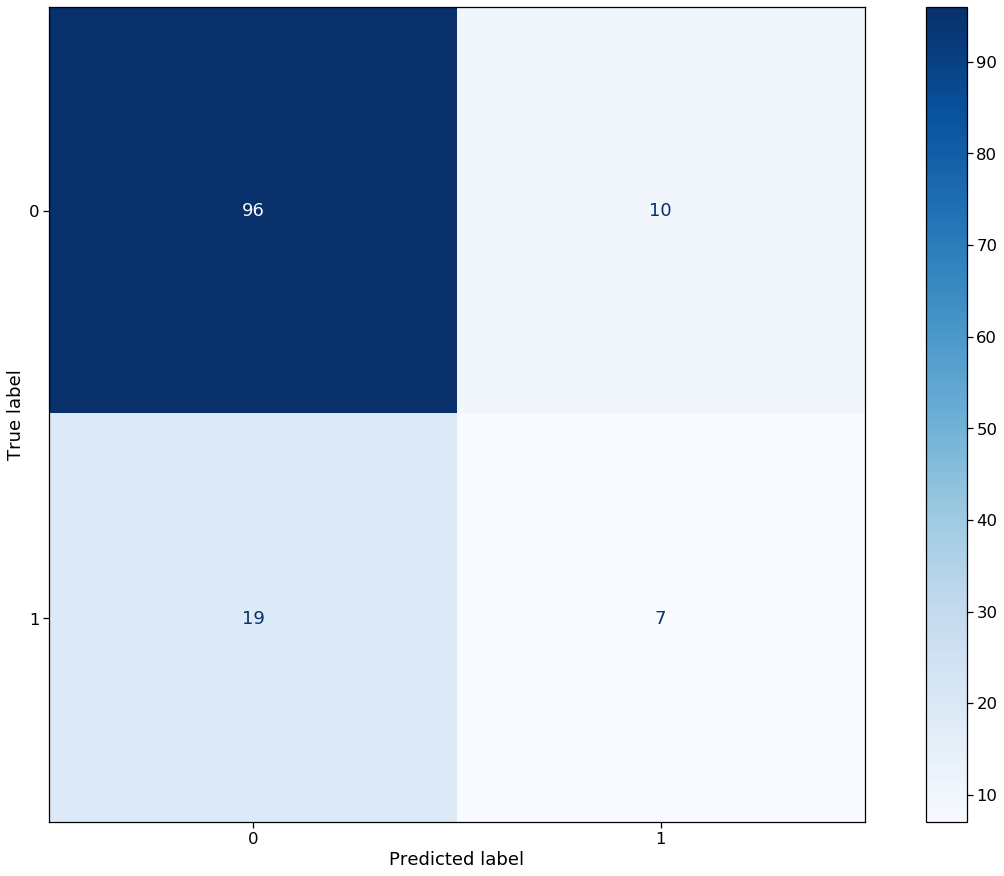

In [72]:
#-- plotando a matrix de confusão
_ = plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)

In [73]:
#-- printando as novas métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       106
           1       0.41      0.27      0.33        26

    accuracy                           0.78       132
   macro avg       0.62      0.59      0.60       132
weighted avg       0.75      0.78      0.76       132



### Tratamento de outliers

In [74]:
#-- copiando o dataset
df_no_outliers = df_dummies.copy()

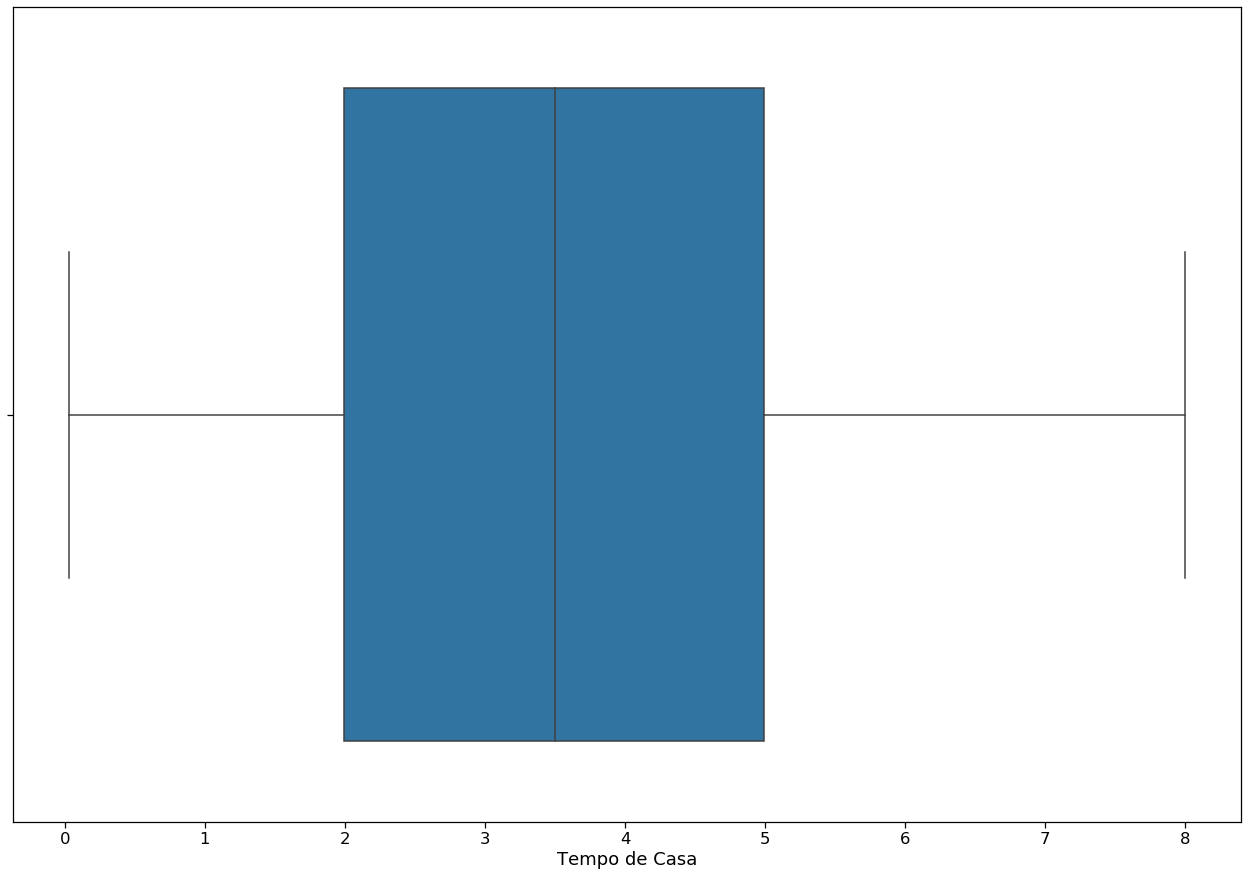

In [75]:
#-- plotando os outliers
sns.boxplot(df_no_outliers['Tempo de Casa'])

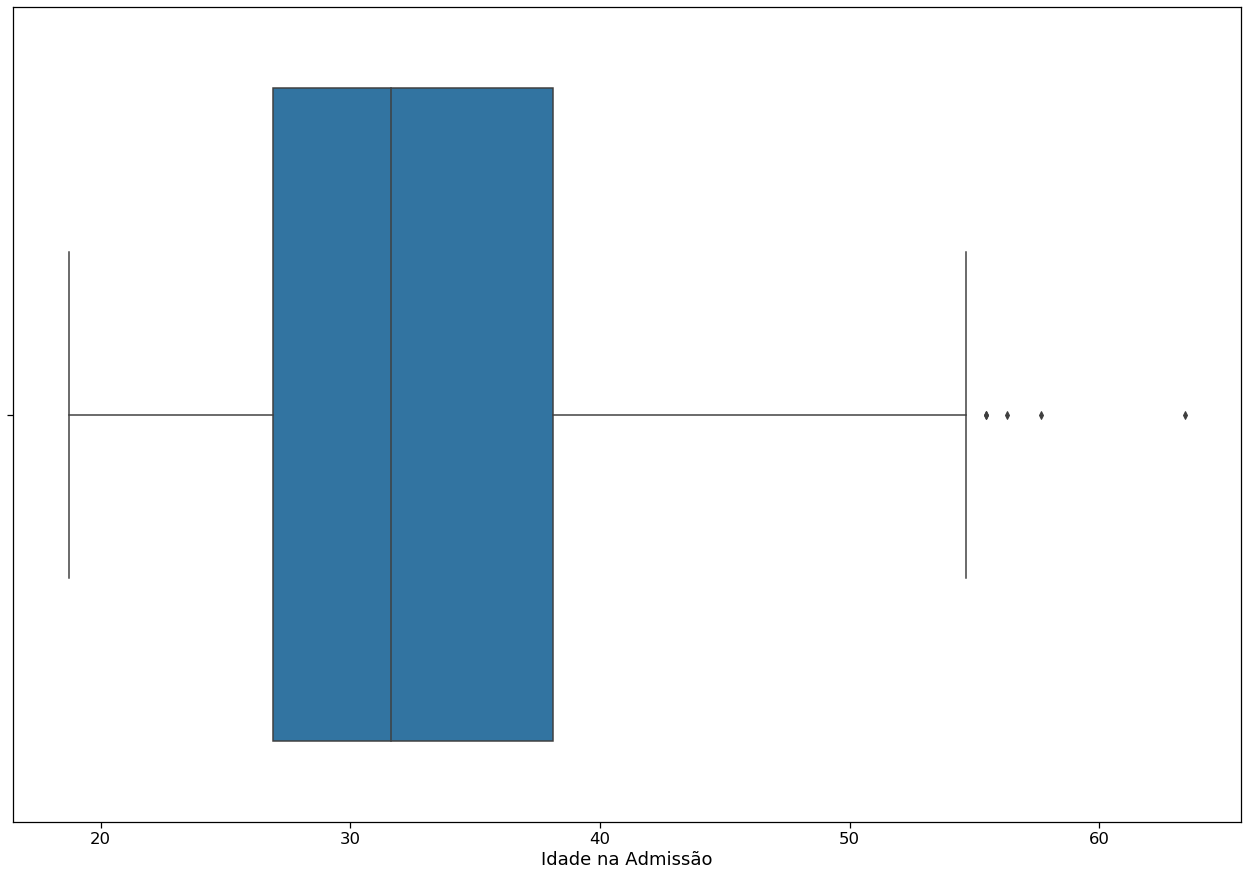

In [76]:
#-- plotando os outliers
sns.boxplot(df_no_outliers['Idade na Admissão'])

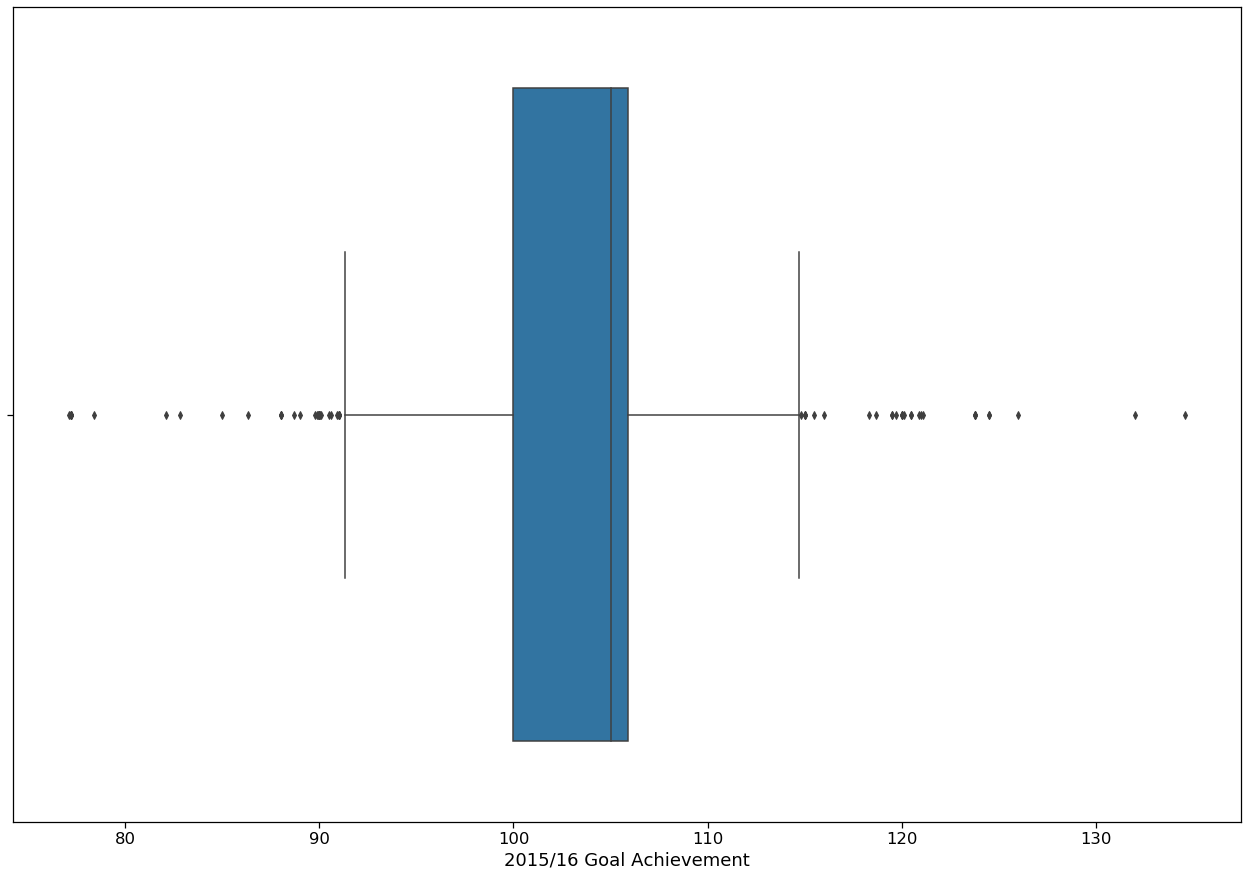

In [77]:
#-- plotando os outliers
sns.boxplot(df_no_outliers['2015/16 Goal Achievement'])

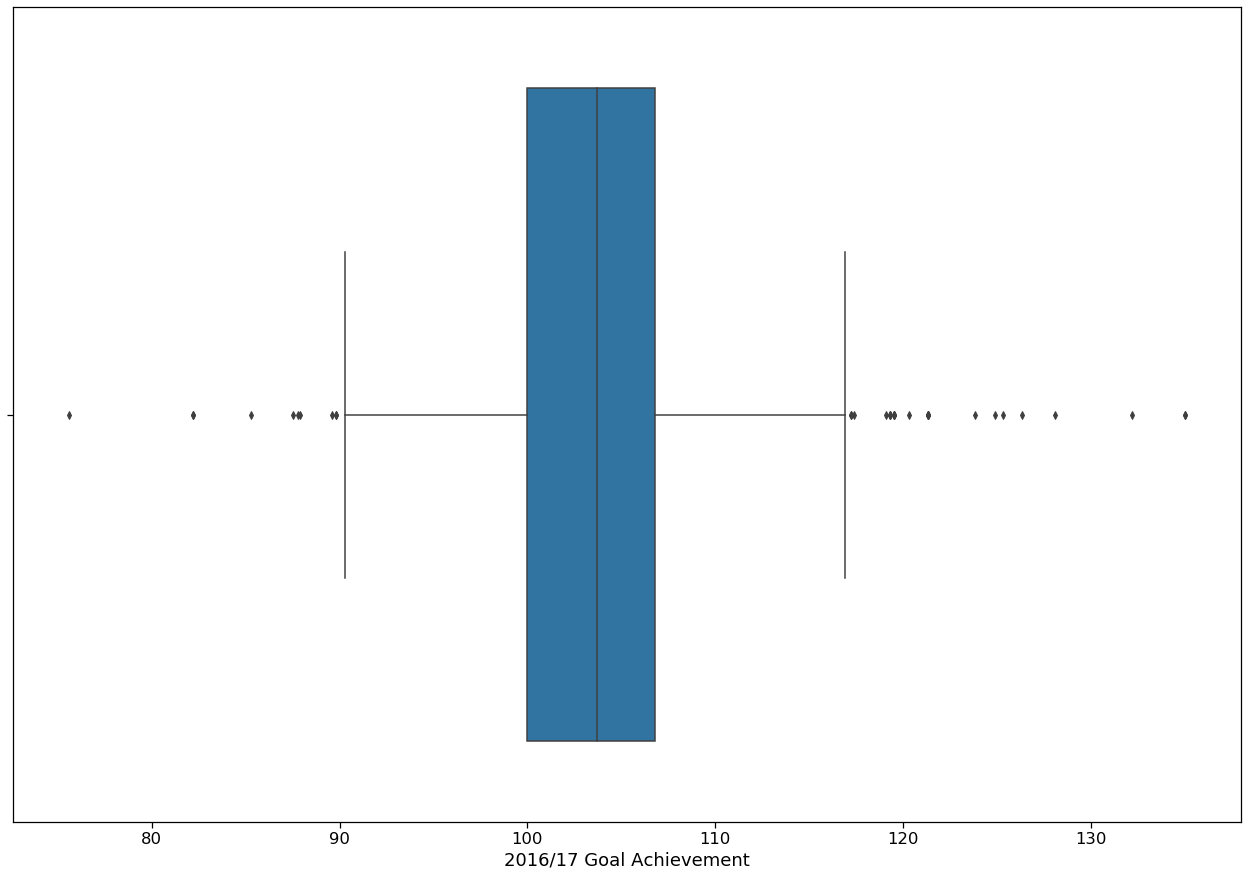

In [78]:
#-- plotando os outliers
sns.boxplot(df_no_outliers['2016/17 Goal Achievement'])

In [79]:
#-- removendo os outliers
df_no_outliers = df_no_outliers[(df_no_outliers['2015/16 Goal Achievement'] > 88) & (df_no_outliers['2015/16 Goal Achievement'] < 120)]
df_no_outliers = df_no_outliers[(df_no_outliers['2016/17 Goal Achievement'] < 122) & (df_no_outliers['2016/17 Goal Achievement'] > 92)]

In [80]:
#-- criando os ds
X = df_no_outliers.drop(columns=['PROMOVIDO'])
y = df_no_outliers['PROMOVIDO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

In [81]:
#-- aplicando o algoritmo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


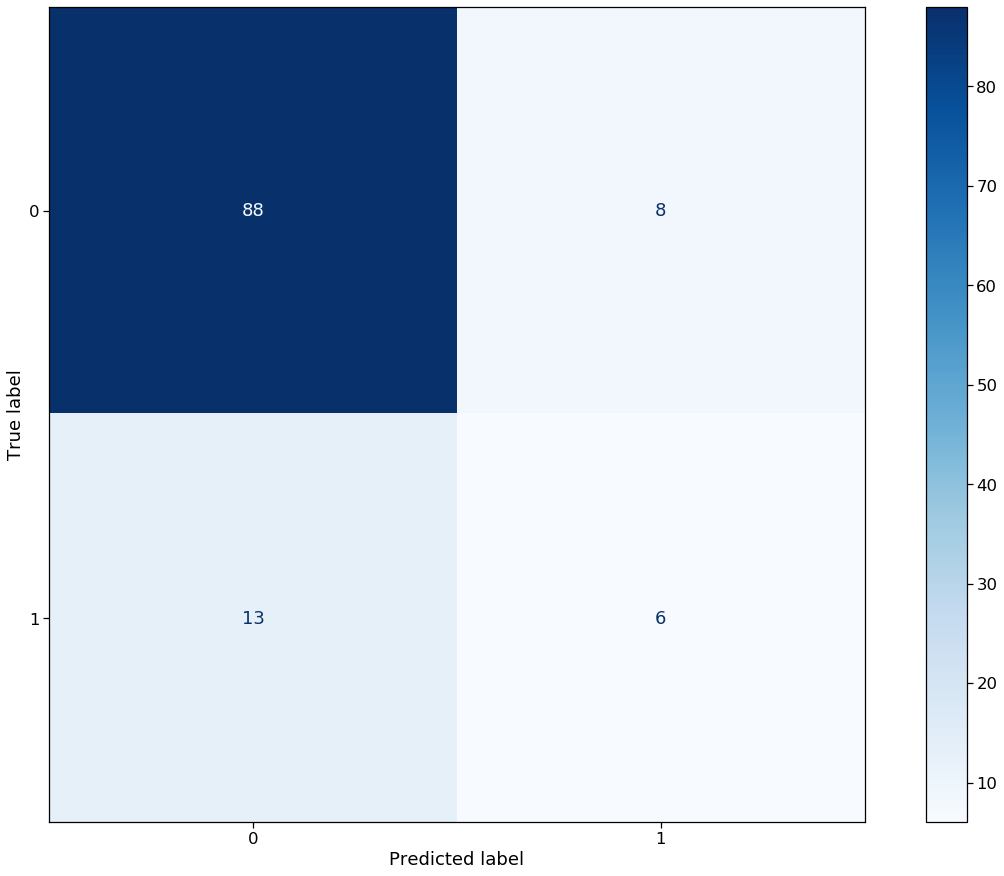

In [82]:
#-- plotando a matrix de confusão
_ = plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)

In [83]:
#-- printando as novas métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        96
           1       0.43      0.32      0.36        19

    accuracy                           0.82       115
   macro avg       0.65      0.62      0.63       115
weighted avg       0.80      0.82      0.81       115



### Padronização (ou standardization) dos dados

In [84]:
#-- copiando o dataset
df_standardized = df_dummies.copy()

In [85]:
df_standardized.head().T

,123,124,125,126,127
Tempo de Casa,7.997260,7.756164,6.175342,0.452055,7.671233
Idade Atual/ Desligamento,30.000000,38.000000,47.901370,31.402740,48.000000
Idade na Admissão,24.178082,32.249315,41.726027,30.950685,42.534247
2015/16 Goal Achievement,90.900000,100.000000,105.300000,109.700000,109.700000
2016/17 Goal Achievement,108.300000,102.300000,111.500000,114.600000,114.600000
PROMOVIDO,1.000000,1.000000,0.000000,0.000000,0.000000
Estado Civil_CASADO,0.000000,1.000000,1.000000,1.000000,1.000000
Estado Civil_SEPARADO,0.000000,0.000000,0.000000,0.000000,0.000000
Estado Civil_SOLTEIRO,1.000000,0.000000,0.000000,0.000000,0.000000
Educação_ENSINO FUNDAMENTAL COMPLETO,0.000000,0.000000,0.000000,0.000000,0.000000


In [86]:
#-- preparando os ds de análise
X = df_standardized.drop(columns=['PROMOVIDO'])
y = df_standardized['PROMOVIDO']

In [87]:
#-- standarizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X_scaled = pd.DataFrame(scaled_data, 
                        index=X.index,
                        columns=X.columns)

df_standardized = pd.concat([X_scaled, y], axis='columns')

In [88]:
#-- pritando os dados do ds
X_scaled.head()

,Tempo de Casa,Idade Atual/ Desligamento,Idade na Admissão,2015/16 Goal Achievement,2016/17 Goal Achievement,Estado Civil_CASADO,Estado Civil_SEPARADO,Estado Civil_SOLTEIRO,Educação_ENSINO FUNDAMENTAL COMPLETO,Educação_ENSINO MÉDIO COMPLETO,Educação_MESTRADO,Educação_PÓS GRADUAÇÃO,Educação_SUPERIOR COMPLETO,Educação_TÉCNICO COMPLETO,Sexo_H,Sexo_M
123,2.282696,-0.632596,-1.081810,-1.510440,0.586449,-1.020716,-0.160315,1.073294,-0.047782,-0.265954,-0.107335,-0.370548,0.588749,-0.245737,-1.409395,1.409395
124,2.157822,0.314368,-0.098211,-0.395356,-0.190410,0.979705,-0.160315,-0.931711,-0.047782,-0.265954,-0.107335,-0.370548,0.588749,-0.245737,-1.409395,1.409395
125,1.339042,1.486399,1.056667,0.254089,1.000774,0.979705,-0.160315,-0.931711,-0.047782,-0.265954,-0.107335,2.698707,-1.698516,-0.245737,0.709524,-0.709524
126,-1.625308,-0.466553,-0.256468,0.793251,1.402151,0.979705,-0.160315,-0.931711,-0.047782,-0.265954,-0.107335,-0.370548,0.588749,-0.245737,0.709524,-0.709524
127,2.113832,1.498073,1.155161,0.793251,1.402151,0.979705,-0.160315,-0.931711,-0.047782,-0.265954,-0.107335,-0.370548,0.588749,-0.245737,-1.409395,1.409395


In [89]:
#-- separando as amostras de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, 
                                                    random_state=0)

In [90]:
#-- aplicando o algoritmo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [91]:
#-- pritando a métrica de teste
print(f'log loss (test): {log_loss(y_test, y_pred_proba):.3f}')

log loss (test): 0.447


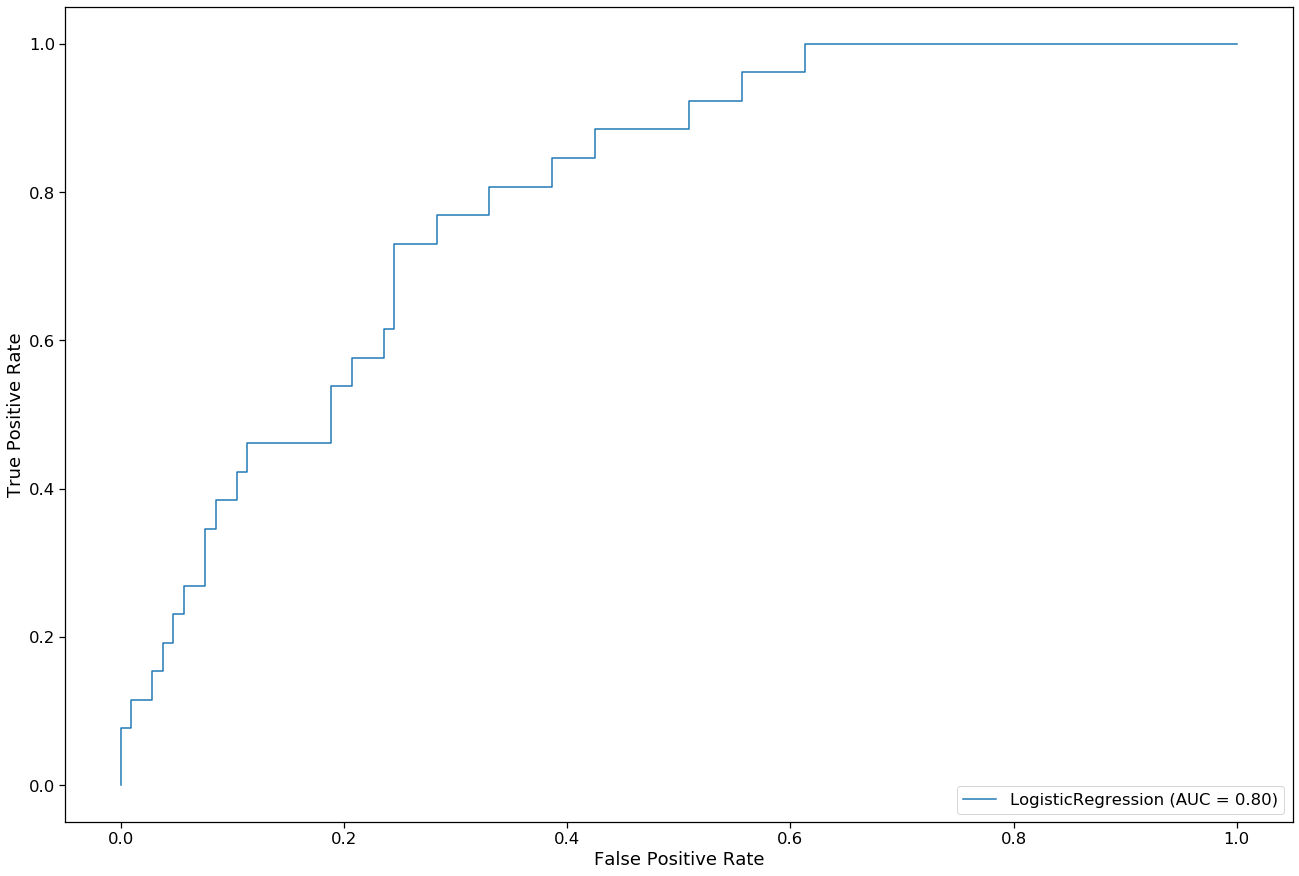

In [92]:
#-- printando a ROC
_= plot_roc_curve(logreg, X_test, y_test)

### Seleção de features

In [93]:
#-- parametrizando o algoritmo de seleção das variáveis
selector = RFECV(logreg, step=1, scoring='roc_auc', n_jobs=-1)

In [94]:
#-- aplicando o algoritmo
_ = selector.fit(X_train, y_train)

In [95]:
#-- apresentando a seleção
pd.DataFrame(data=selector.support_,
             columns=['support'],
             index=X.columns).T

,Tempo de Casa,Idade Atual/ Desligamento,Idade na Admissão,2015/16 Goal Achievement,2016/17 Goal Achievement,Estado Civil_CASADO,Estado Civil_SEPARADO,Estado Civil_SOLTEIRO,Educação_ENSINO FUNDAMENTAL COMPLETO,Educação_ENSINO MÉDIO COMPLETO,Educação_MESTRADO,Educação_PÓS GRADUAÇÃO,Educação_SUPERIOR COMPLETO,Educação_TÉCNICO COMPLETO,Sexo_H,Sexo_M
support,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False


In [96]:
#-- apresentando a seleção
pd.DataFrame(data=selector.ranking_,
             columns=['support'],
             index=X.columns).T

,Tempo de Casa,Idade Atual/ Desligamento,Idade na Admissão,2015/16 Goal Achievement,2016/17 Goal Achievement,Estado Civil_CASADO,Estado Civil_SEPARADO,Estado Civil_SOLTEIRO,Educação_ENSINO FUNDAMENTAL COMPLETO,Educação_ENSINO MÉDIO COMPLETO,Educação_MESTRADO,Educação_PÓS GRADUAÇÃO,Educação_SUPERIOR COMPLETO,Educação_TÉCNICO COMPLETO,Sexo_H,Sexo_M
support,1,1,4,1,1,2,5,6,8,1,10,9,7,3,12,11


In [97]:
#-- criando um novo dataset
df_selection = selector.transform(X_train)
df_selection.shape

(307, 5)

In [98]:
#-- selecionando a coluna de resposta
y_pred_proba = selector.predict_proba(X_test)[:, 1]

In [99]:
#-- pritando a métrica de log loss
print(f'log loss (test): {log_loss(y_test, y_pred_proba):.3f}')

log loss (test): 0.468


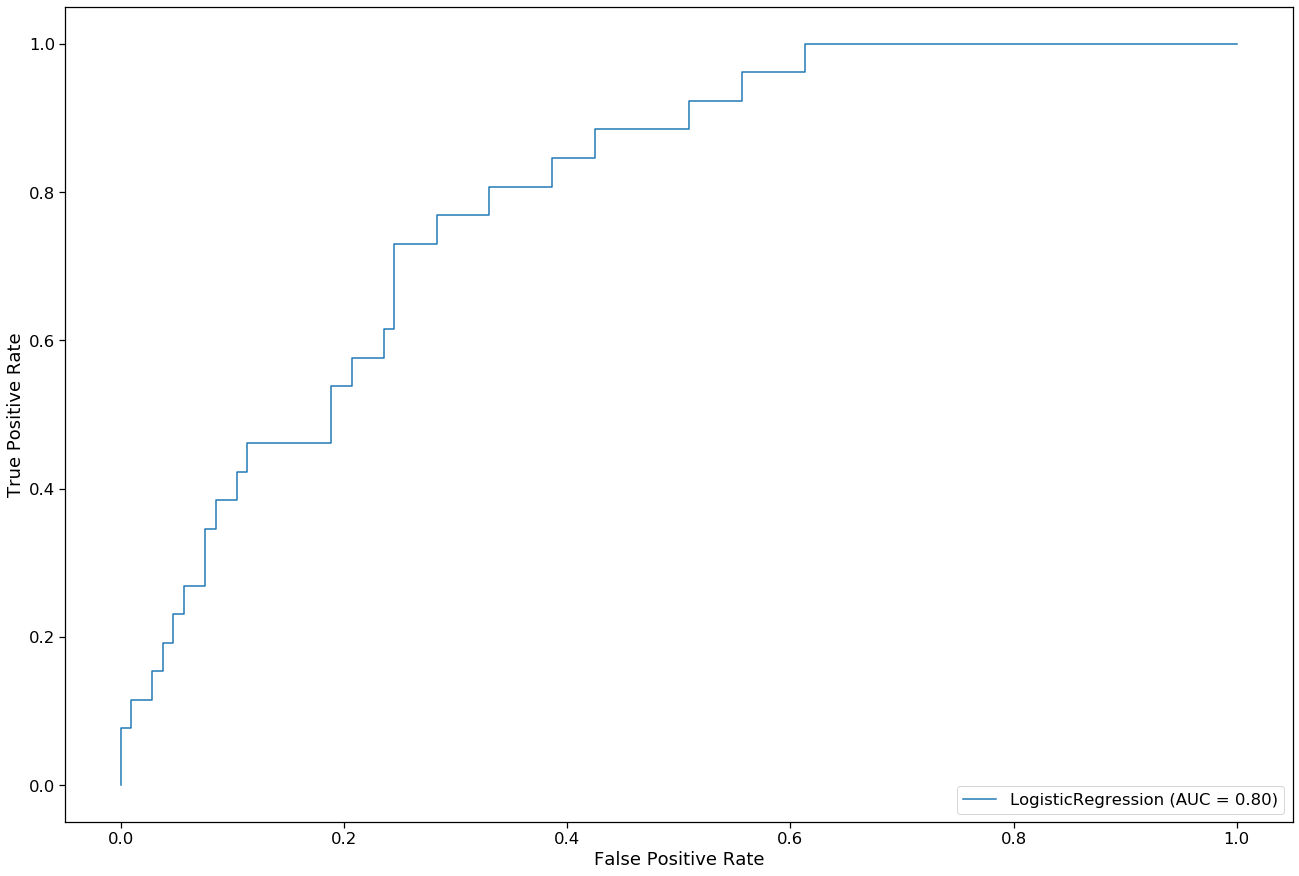

In [100]:
#-- printando a ROC
_= plot_roc_curve(logreg, X_test, y_test)

In [101]:
#-- checking multcolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [102]:
#-- sorting data by multicolineatiry
vif.round(1).sort_values(['VIF Factor'], ascending=True)

,VIF Factor,features
3,1.2,2015/16 Goal Achievement
4,1.2,2016/17 Goal Achievement
0,5.0,Tempo de Casa
2,151.8,Idade na Admissão
1,160.9,Idade Atual/ Desligamento
5,inf,Estado Civil_CASADO
6,inf,Estado Civil_SEPARADO
7,inf,Estado Civil_SOLTEIRO
8,inf,Educação_ENSINO FUNDAMENTAL COMPLETO
9,inf,Educação_ENSINO MÉDIO COMPLETO


### Balanceamento

In [103]:
#-- o moodelo está balanceado?
pd.DataFrame(y)['PROMOVIDO'].value_counts()

0    350
1     89
Name: PROMOVIDO, dtype: int64

In [105]:
#-- criando o balanceamento
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y)

#-- checando
print("tamanho do dataset ",len(os_data_X))
print("não promovidos",len(os_data_y[os_data_y['PROMOVIDO']==0]))
print("promovidos",len(os_data_y[os_data_y['PROMOVIDO']==1]))
print("proporção de não promovido ",len(os_data_y[os_data_y['PROMOVIDO']==0])/len(os_data_X))
print("proporção de promovido ",len(os_data_y[os_data_y['PROMOVIDO']==1])/len(os_data_X))

tamanho do dataset  488
não promovidos 244
promovidos 244
proporção de não promovido  0.5
proporção de promovido  0.5


In [106]:
logreg_up = LogisticRegression()

In [107]:
logreg_up.fit(os_data_X, os_data_y)
y_pred = logreg_up.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
accuracy_test = accuracy_score(y_test, y_pred)
print(f'accuracy (test): {accuracy_test*100:.1f}%')

accuracy (test): 75.8%


In [109]:
confusion_matrix(y_test, y_pred)

array([[84, 22],
       [10, 16]], dtype=int64)

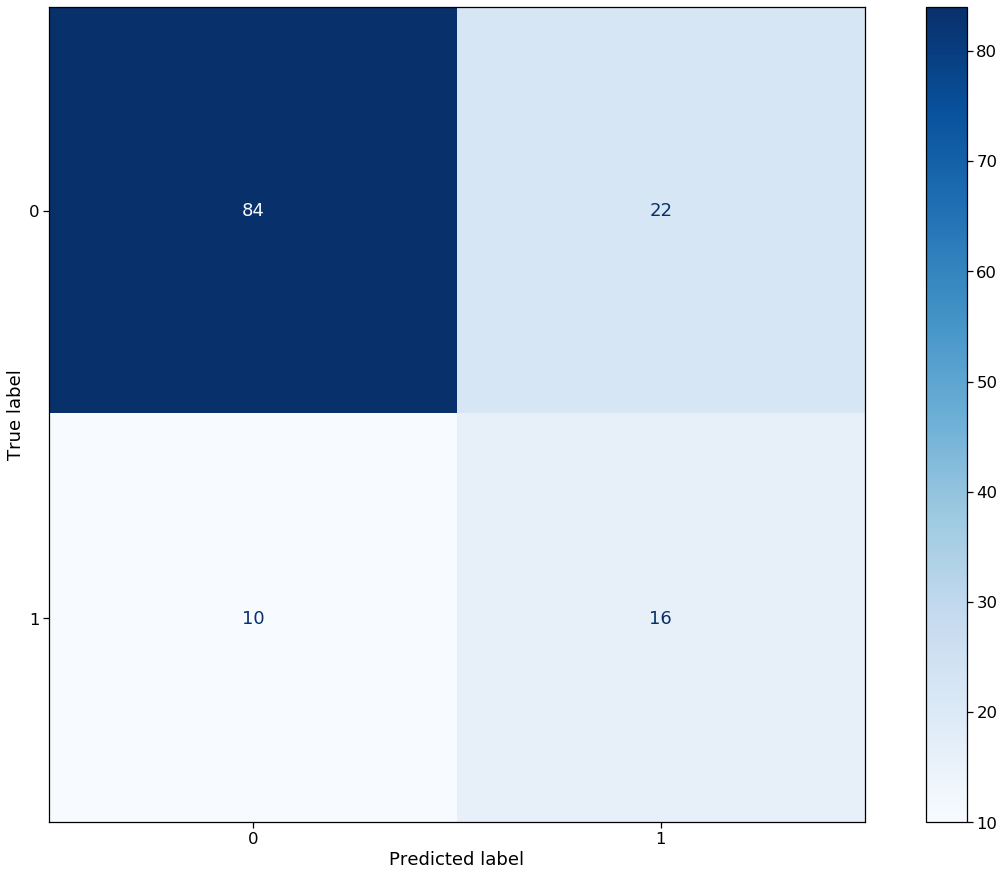

In [110]:
#-- printando a matriz de confusão
_ = plot_confusion_matrix(logreg_up, X_test, y_test, cmap=plt.cm.Blues)

In [111]:
#-- printando as novas métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       106
           1       0.42      0.62      0.50        26

    accuracy                           0.76       132
   macro avg       0.66      0.70      0.67       132
weighted avg       0.80      0.76      0.77       132



## Salvando o modelo

Vamos salvar o modelo para conseguirmos carregá-lo em análises futuras pós-aula.
Para detalhes, veja a documentação do scikit-learn: [Model Persistence](http://scikit-learn.org/stable/modules/model_persistence.html).

In [112]:
_ = joblib.dump(logreg, '../models/logreg.pkl') 

Vamos também salvar o dataset transformado, assim como foi utilizado pelo modelo final. Para facilitar a interpretação do modelo, salvaremos também uma versão para "display", que é sua versão antes da padronização dos dados.

In [113]:
df_standardized.to_csv('../data/Base Analytics Processed.csv', index=False)